In [1]:
import numpy as np
import cupy as cp
import rasterio
import matplotlib.pyplot as plt

## Cargado de Mapas de los lagos Steffen y Martin

In [4]:
# Ruta del archivo
ruta_mapas = [r'c:/Users/becer/OneDrive/Desktop/Maestría en Ciencias Físicas/Tesis/Incendios-Forestales---MCF-2024-2025/mapas_steffen_martin/ang_wind.asc',   
              r'c:/Users/becer/OneDrive/Desktop/Maestría en Ciencias Físicas/Tesis/Incendios-Forestales---MCF-2024-2025/mapas_steffen_martin/speed_wind.asc',
              r'c:/Users/becer/OneDrive/Desktop/Maestría en Ciencias Físicas/Tesis/Incendios-Forestales---MCF-2024-2025/mapas_steffen_martin/asc_slope.asc',  
              r'c:/Users/becer/OneDrive/Desktop/Maestría en Ciencias Físicas/Tesis/Incendios-Forestales---MCF-2024-2025/mapas_steffen_martin/asc_CIEFAP.asc', 
              r'c:/Users/becer/OneDrive/Desktop/Maestría en Ciencias Físicas/Tesis/Incendios-Forestales---MCF-2024-2025/mapas_steffen_martin/asc_aspect.asc']

datos = []

# Leer cada archivo con rasterio
for mapa in ruta_mapas:
    with rasterio.open(mapa) as src:
        # Leer los datos como una matriz de numpy
        data = src.read(1)  # Leer la primera banda (asumiendo datos en una banda)
        datos.append(data)
        ny = src.height # Nro de filas
        nx = src.width # Nro de columnas

# Tamaño de cada celda
d = 30 # metros

vientod = datos[0]
vientov = datos[1]
pendiente = datos[2]
vegetacion = datos[3]
orientacion = datos[4]

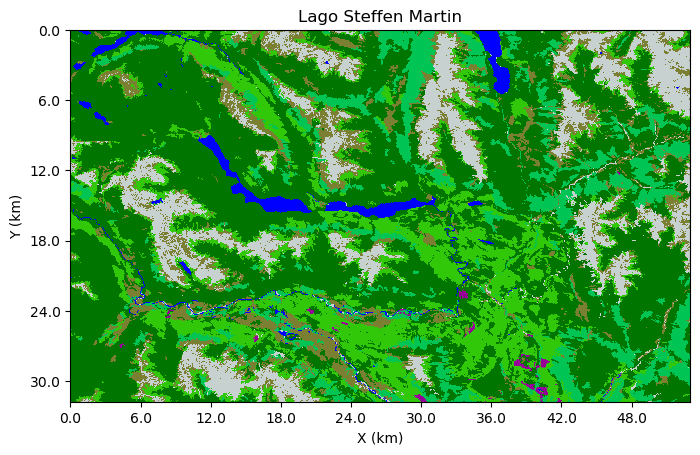

In [5]:
# Definir los nuevos colores para los valores del archivo (0 a 7)
vegetation_colors = np.array([
    [255, 0, 255],      # 0: NODATA (magenta)
    [199, 209, 207],    # 1: Sin combustible (gris claro)
    [0, 0, 255],        # 2: Lagos (azul)
    [0, 117, 0],        # 3: Bosque A (verde oscuro)
    [50, 200, 10],      # 4: Bosque B (verde brillante)
    [150, 0, 150],      # 5: Bosque I (morado)
    [122, 127, 50],     # 6: Pastizal (verde oliva)
    [0, 196, 83]        # 7: Arbustal (verde intenso)
]) / 255.0  # Escalar los valores RGB al rango [0, 1]

# Mapear los valores de vegetación a colores RGB
vegetation = vegetation_colors[vegetacion.astype(int)]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(vegetation, interpolation='nearest')
x_ticks = np.arange(0, nx, 200)  # Cada 200 celdas en el eje X
y_ticks = np.arange(0, ny, 200)  # Cada 200 celdas en el eje Y
x_labels = (x_ticks * d) / 1000  # Convertir a kilómetros
y_labels = (y_ticks * d) / 1000
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([f"{x:.1f}" for x in x_labels])  # Formato con 1 decimal
ax.set_yticklabels([f"{y:.1f}" for y in y_labels])  # Formato con 1 decimal
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
plt.title('Lago Steffen Martin')
# plt.savefig('grilla_nuevos_colores.png', dpi=300, bbox_inches='tight')
plt.show()

## Incendio de referencia

Text(0, 0.5, 'Y (km)')

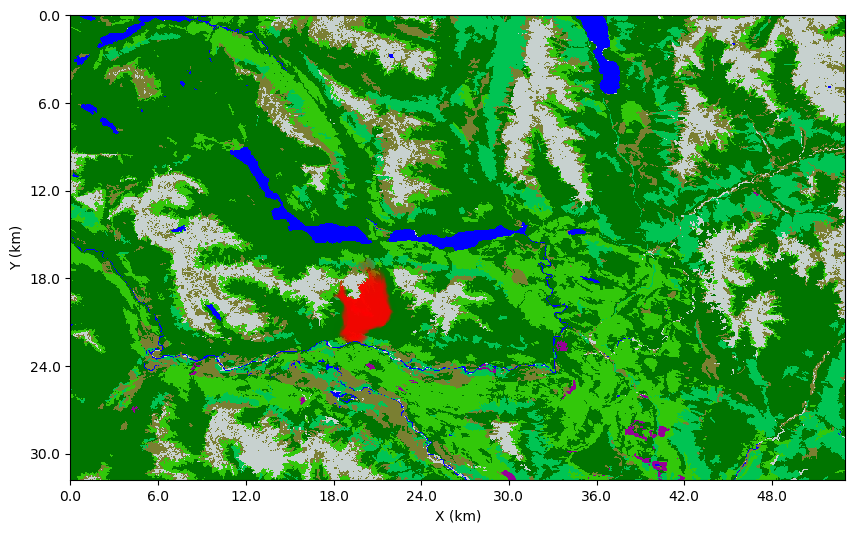

In [6]:
# Cargar el archivo R_history.npy con NumPy
R_np = np.load("R_final.npy")

fig, ax1 = plt.subplots(figsize=(10, 10))

terrain_rgb = (1 - np.clip(R_np[..., None], 0, 1)) * vegetation + np.clip(R_np[..., None], 0, 1) * np.array([1.0, 0.0, 0.0])
im2 = ax1.imshow(terrain_rgb, interpolation='nearest')

# Aplicar los ticks y etiquetas a los ejes
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_xticklabels([f"{x:.1f}" for x in x_labels])  # Formato con 2 decimales
ax1.set_yticklabels([f"{y:.1f}" for y in y_labels])  # Formato con 2 decimales

# Etiquetas de los ejes
ax1.set_xlabel("X (km)")
ax1.set_ylabel("Y (km)")

## Área quemada (incendio real)

Text(0, 0.5, 'Y (km)')

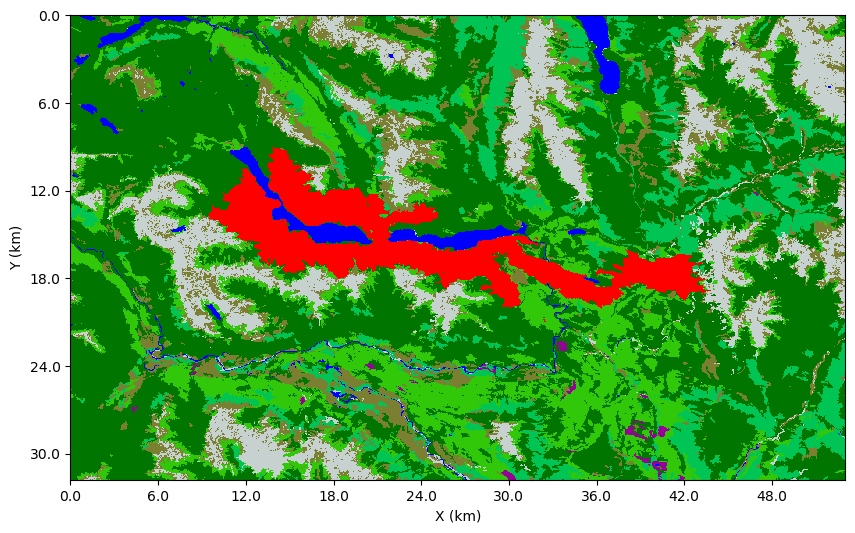

In [7]:
mapa_real = r'c:/Users/becer/OneDrive/Desktop/Maestría en Ciencias Físicas/Tesis/Incendios-Forestales---MCF-2024-2025/mapas_steffen_martin/area_quemada_SM.asc'

with rasterio.open(mapa_real) as src:
    # Leer los datos como una matriz de numpy
    area_quemada = src.read(1)  # Leer la primera banda (asumiendo datos en una banda)
    ny = src.height # Nro de filas
    nx = src.width # Nro de columnas

fig, ax1 = plt.subplots(figsize=(10, 10))

terrain_rgb = (1 - np.clip(area_quemada[..., None], 0, 1)) * vegetation + np.clip(area_quemada[..., None], 0, 1) * np.array([1.0, 0.0, 0.0])
im2 = ax1.imshow(terrain_rgb, interpolation='nearest')

# Aplicar los ticks y etiquetas a los ejes
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_xticklabels([f"{x:.1f}" for x in x_labels])  # Formato con 2 decimales
ax1.set_yticklabels([f"{y:.1f}" for y in y_labels])  # Formato con 2 decimales

# Etiquetas de los ejes
ax1.set_xlabel("X (km)")
ax1.set_ylabel("Y (km)")
